In [67]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [68]:
benchmark_results_files = sorted([file for file in os.listdir('data/') if not file.startswith('.')])
benchmark_results_files

['broadcast-ailist-benchmark-all-to-all.csv',
 'broadcast-ailist-benchmark-one-to-all.csv',
 'broadcast-ailist-benchmark-one-to-one.csv',
 'broadcast-ailist-benchmark-spanning-16.csv',
 'broadcast-ailist-benchmark-spanning-4.csv',
 'broadcast-ailist-benchmark-sparse-16.csv',
 'partitioned-ailist-benchmark-1000-all-to-all.csv',
 'partitioned-ailist-benchmark-1000-one-to-all.csv',
 'partitioned-ailist-benchmark-1000-one-to-one.csv',
 'partitioned-ailist-benchmark-1000-spanning-16.csv',
 'partitioned-ailist-benchmark-1000-spanning-4.csv',
 'partitioned-ailist-benchmark-1000-sparse-16.csv',
 'partitioned-ailist-benchmark-10000-all-to-all.csv',
 'partitioned-ailist-benchmark-10000-one-to-all.csv',
 'partitioned-ailist-benchmark-10000-one-to-one.csv',
 'partitioned-ailist-benchmark-10000-spanning-16.csv',
 'partitioned-ailist-benchmark-10000-spanning-4.csv',
 'partitioned-ailist-benchmark-10000-sparse-16.csv',
 'spark-native-bucketing-benchmark-10-all-to-all.csv',
 'spark-native-bucketing-be

In [69]:
benchmark_results_dfs = [pd.read_csv(f"data/{file}", on_bad_lines="warn") for file in benchmark_results_files]
benchmark_results_df  = pd.concat(benchmark_results_dfs) 
benchmark_results_df.head()

/var/folders/fl/q2crvvk97736ltj4g546m26w0000gn/T/ipykernel_3023/1589997440.py:1: ParserWarning: Skipping line 10: expected 6 fields, saw 7

  benchmark_results_dfs = [pd.read_csv(f"data/{file}", on_bad_lines="warn") for file in benchmark_results_files]
/var/folders/fl/q2crvvk97736ltj4g546m26w0000gn/T/ipykernel_3023/1589997440.py:1: ParserWarning: Skipping line 10: expected 6 fields, saw 7

  benchmark_results_dfs = [pd.read_csv(f"data/{file}", on_bad_lines="warn") for file in benchmark_results_files]
/var/folders/fl/q2crvvk97736ltj4g546m26w0000gn/T/ipykernel_3023/1589997440.py:1: ParserWarning: Skipping line 12: expected 6 fields, saw 9

  benchmark_results_dfs = [pd.read_csv(f"data/{file}", on_bad_lines="warn") for file in benchmark_results_files]


,data_suite,clusters_count,rows_per_cluster,join_name,elapsed_time,result
0,all-to-all,16,100,broadcast-ailist-benchmark,931,success
1,all-to-all,16,250,broadcast-ailist-benchmark,188,success
2,all-to-all,16,500,broadcast-ailist-benchmark,128,success
3,all-to-all,16,1000,broadcast-ailist-benchmark,131,success
4,all-to-all,16,2500,broadcast-ailist-benchmark,131,success


In [70]:
def plot_dataset(dataset, data_suites = None, join_names = None):
    if data_suites is None:
        data_suites = dataset['data_suite'].unique()
        
    if join_names is None:
        join_names = dataset['join_name'].unique()
    
    dataset = dataset.query('result == "success"')
    plot_figure, plot_axes = plt.subplots(len(data_suites), 2, figsize=(16, 4 * len(data_suites)))

    plt.ticklabel_format(useOffset=False)

    for data_suite_index in range(len(data_suites)):
        data_suite = data_suites[data_suite_index]
        
        plot_left  = plot_axes[data_suite_index, 0]
        plot_right = plot_axes[data_suite_index, 1]

        plot_left.set_title(f'{data_suite} - lin')
        plot_right.set_title(f'{data_suite} - log')
    
        for join_name in join_names:
            df_to_plot = dataset.query(f'join_name == "{join_name}" and data_suite == "{data_suite}"')
            
            [dataset['join_name'] == join_name]
            plot_left.plot(df_to_plot['rows_per_cluster'], df_to_plot['elapsed_time'], label=join_name)
            plot_right.plot(df_to_plot['rows_per_cluster'], df_to_plot['elapsed_time'], label=join_name)
            
            plot_right.semilogx() 
            plot_right.legend(bbox_to_anchor=(1, 1.005))
    
    # Adding labels and title
    # plt.xlabel('Data size')
    # plt.ylabel('Elapsed time')

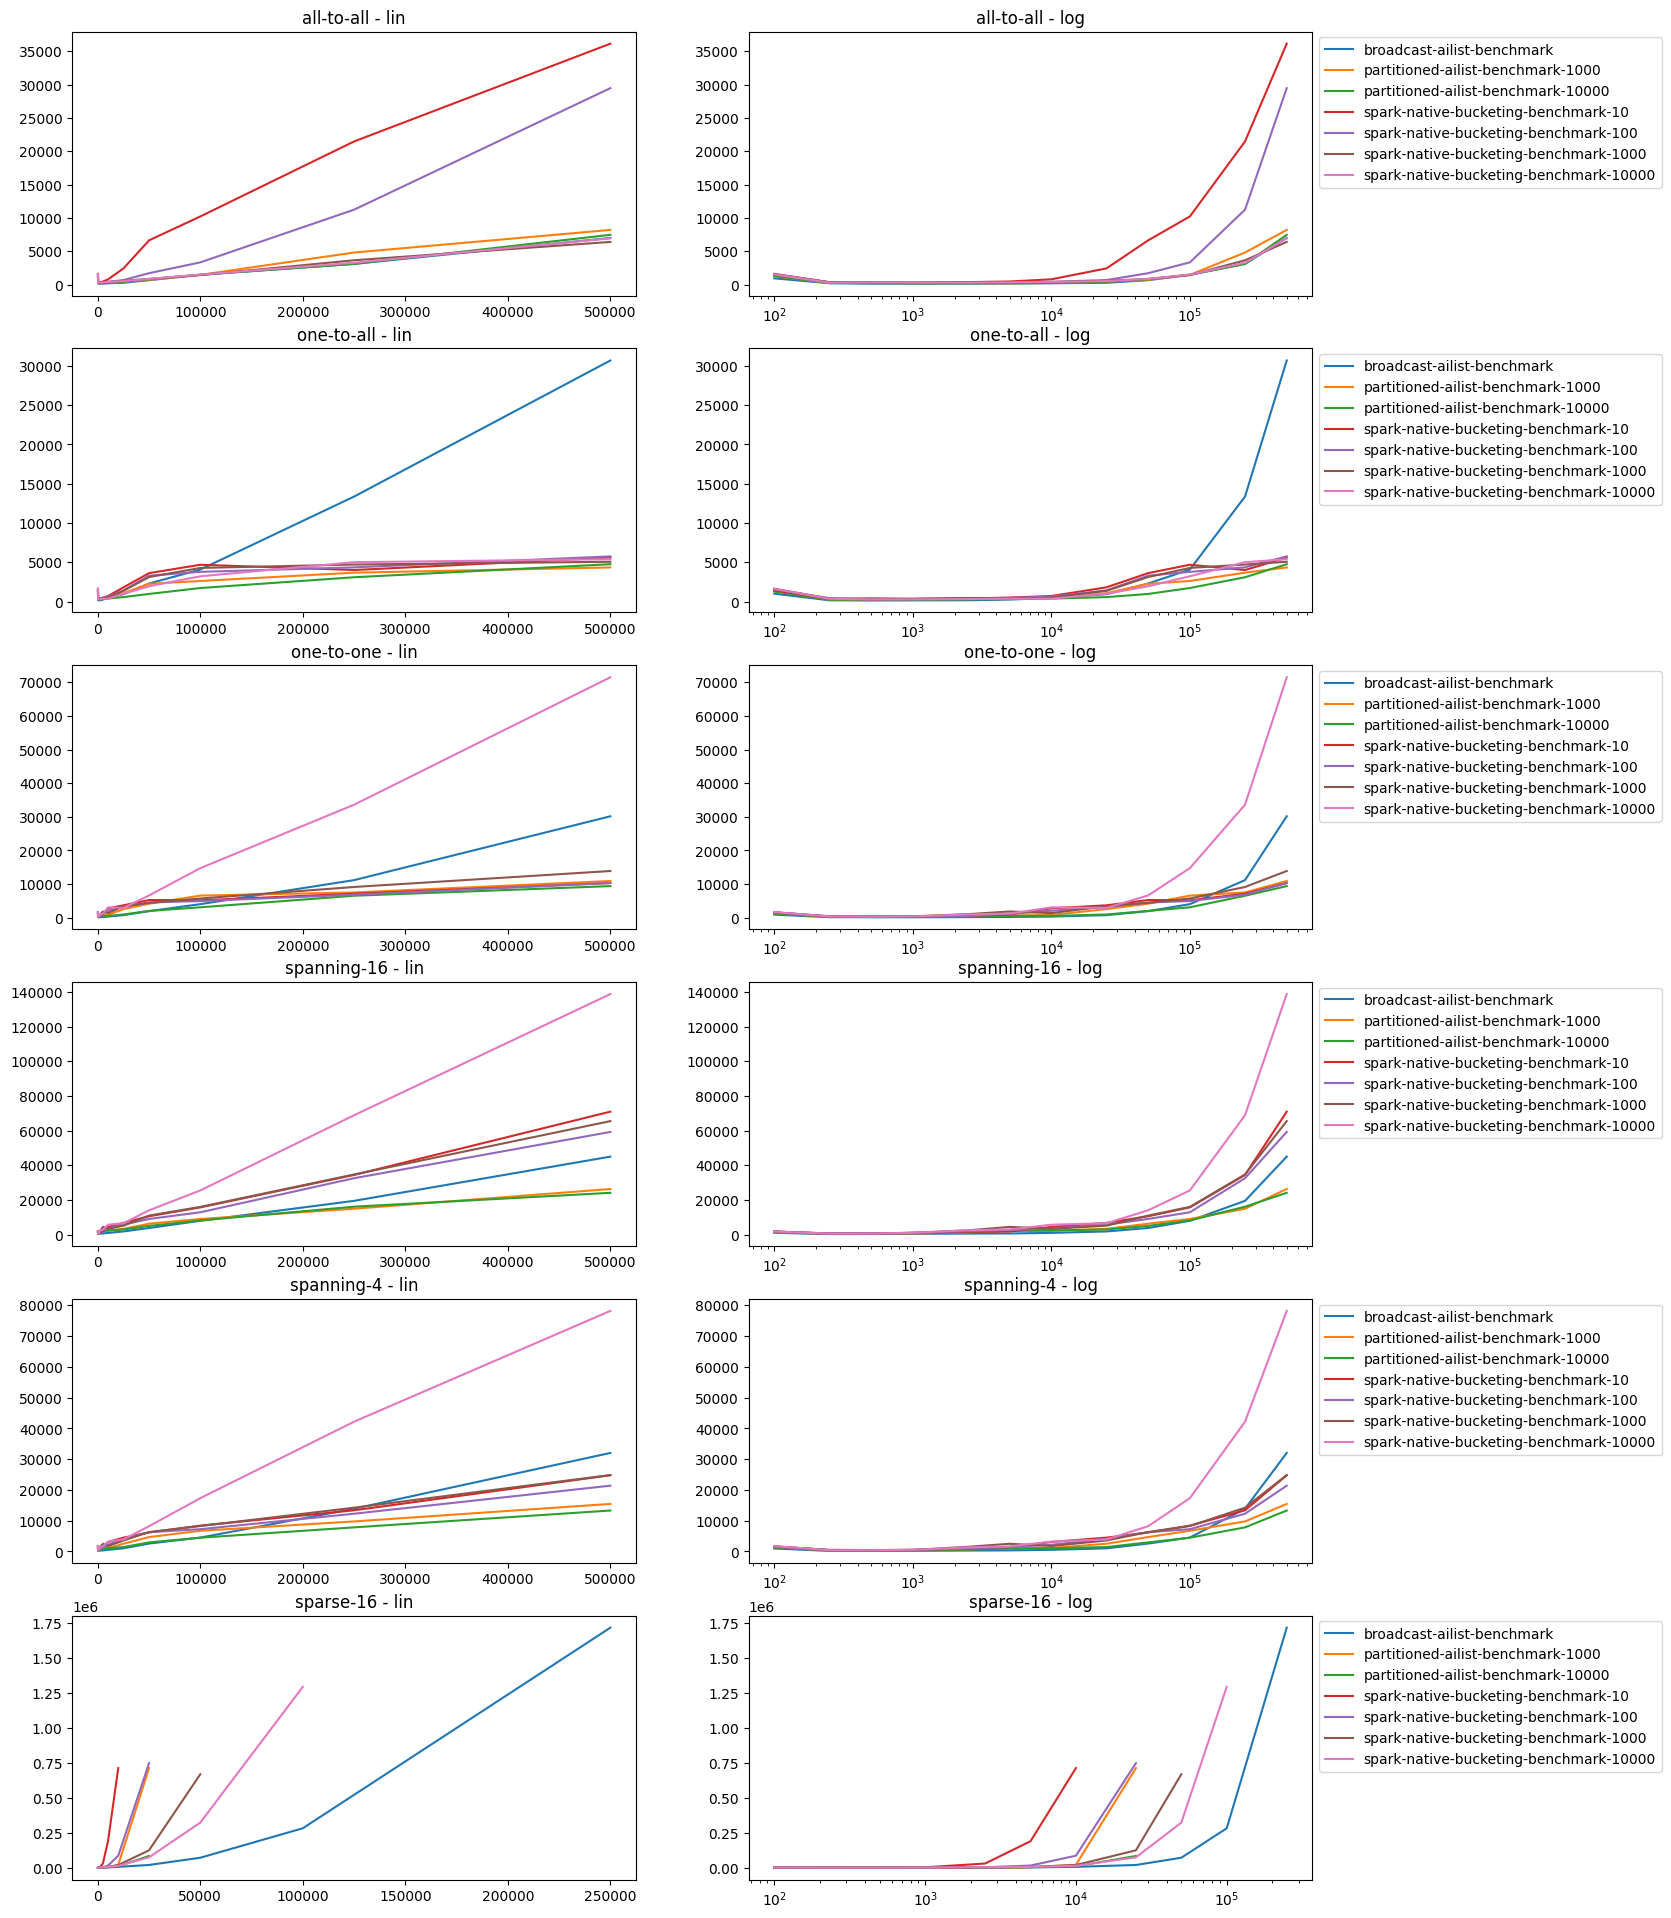

In [71]:
plot_dataset(benchmark_results_df)

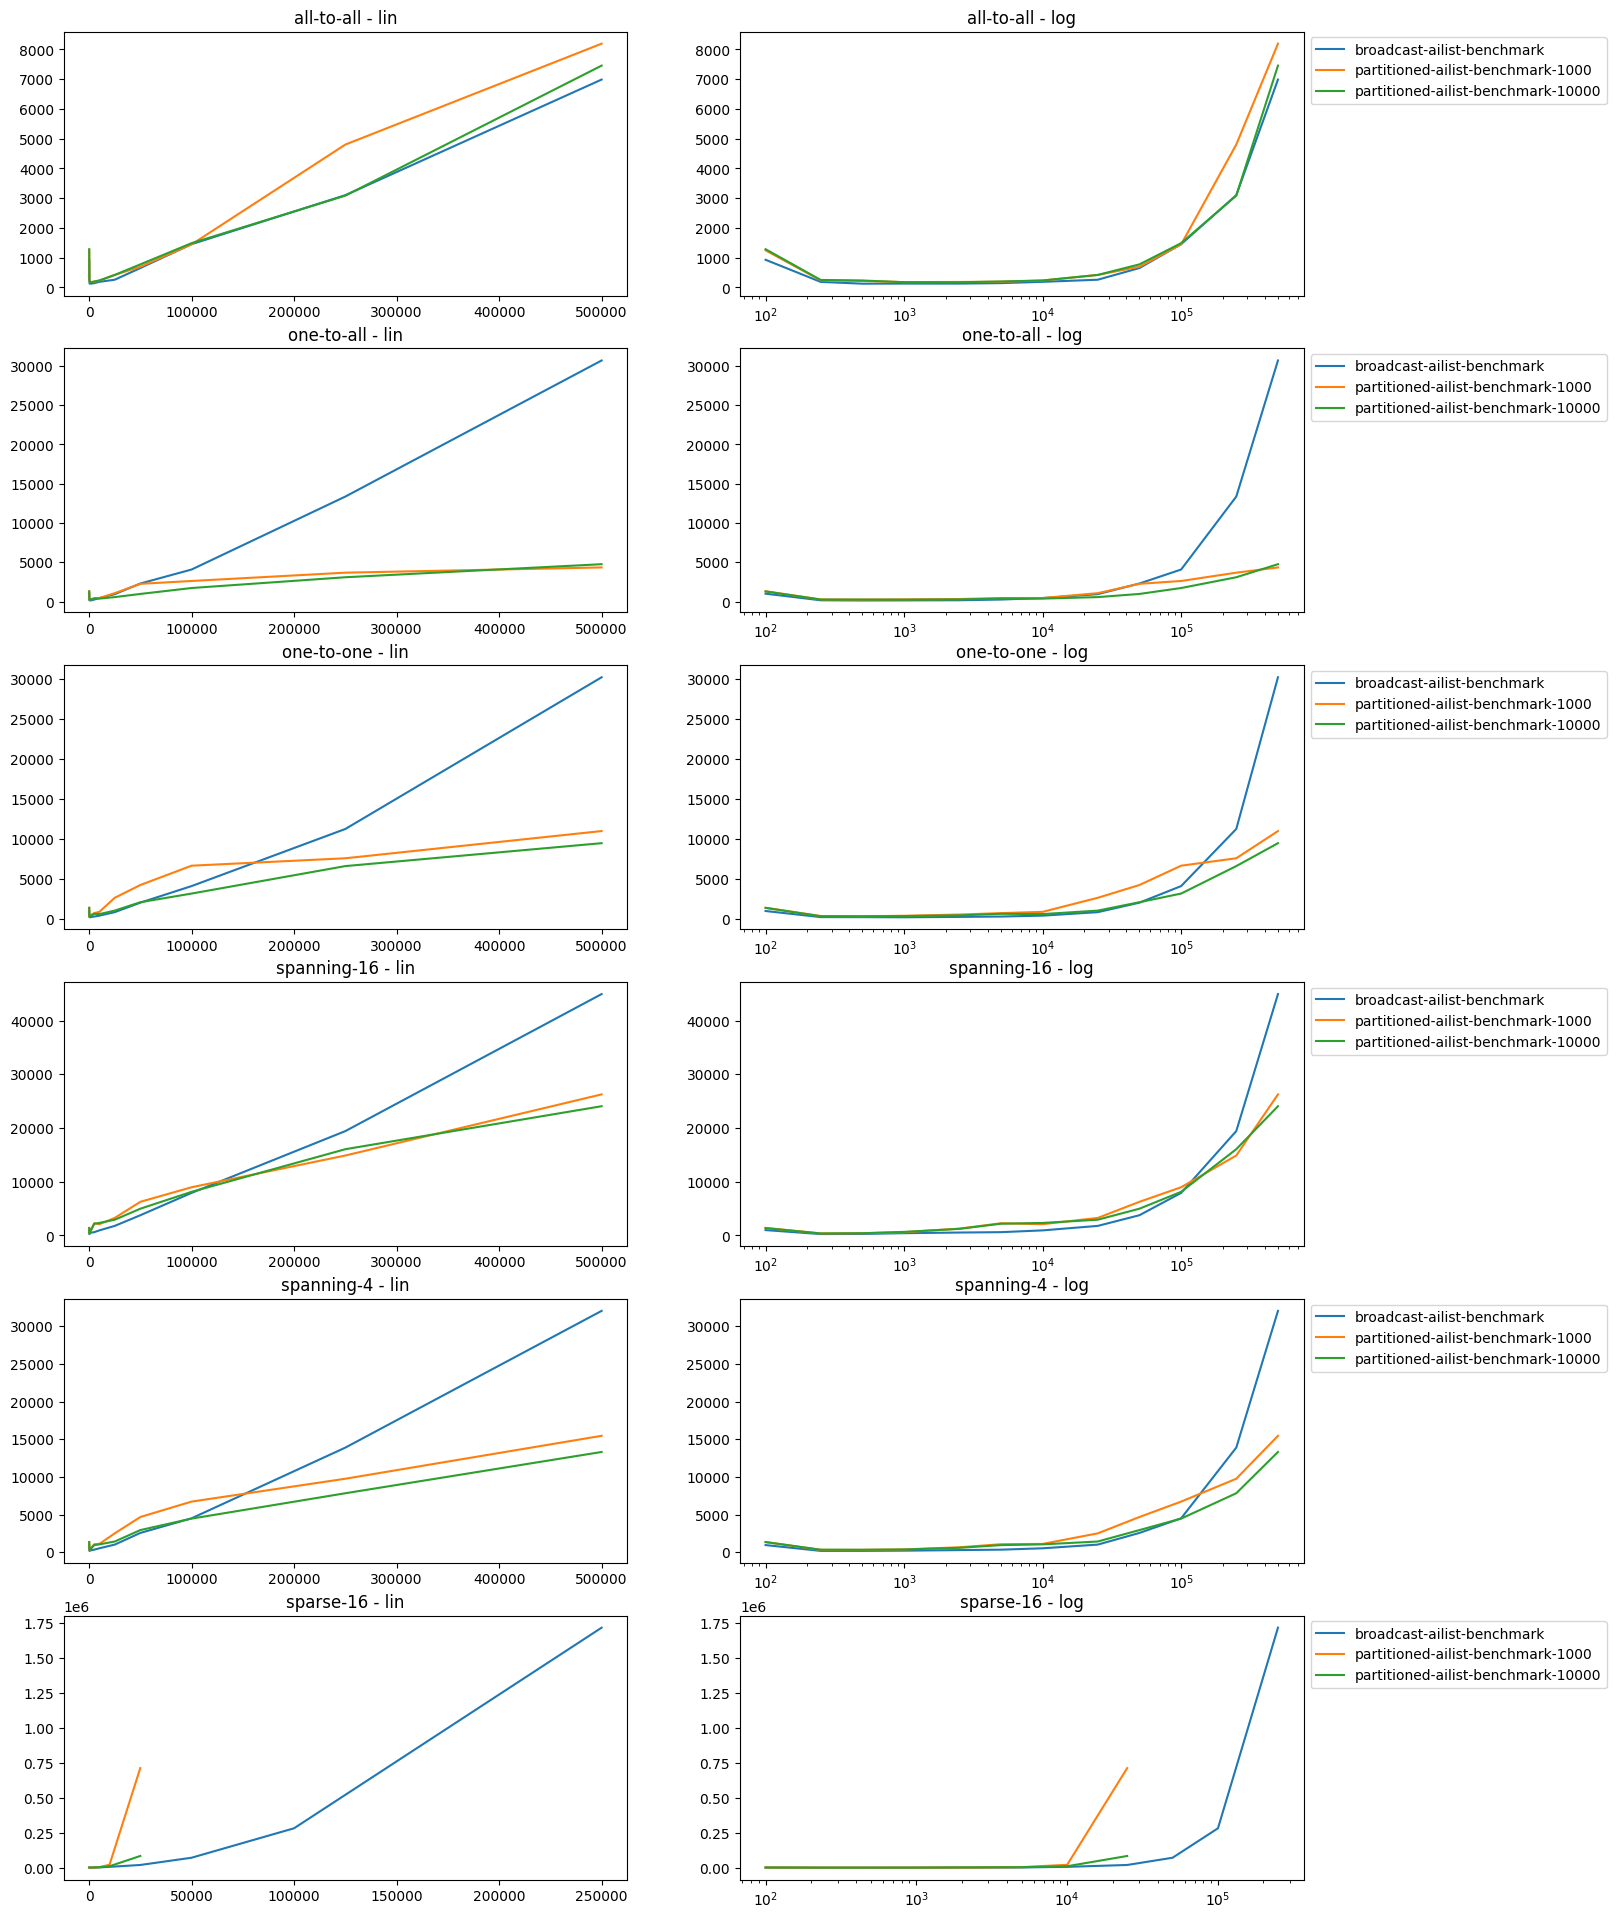

In [75]:
plot_dataset(benchmark_results_df, join_names = [
    "broadcast-ailist-benchmark",
    "partitioned-ailist-benchmark-1000",
    "partitioned-ailist-benchmark-10000"
])

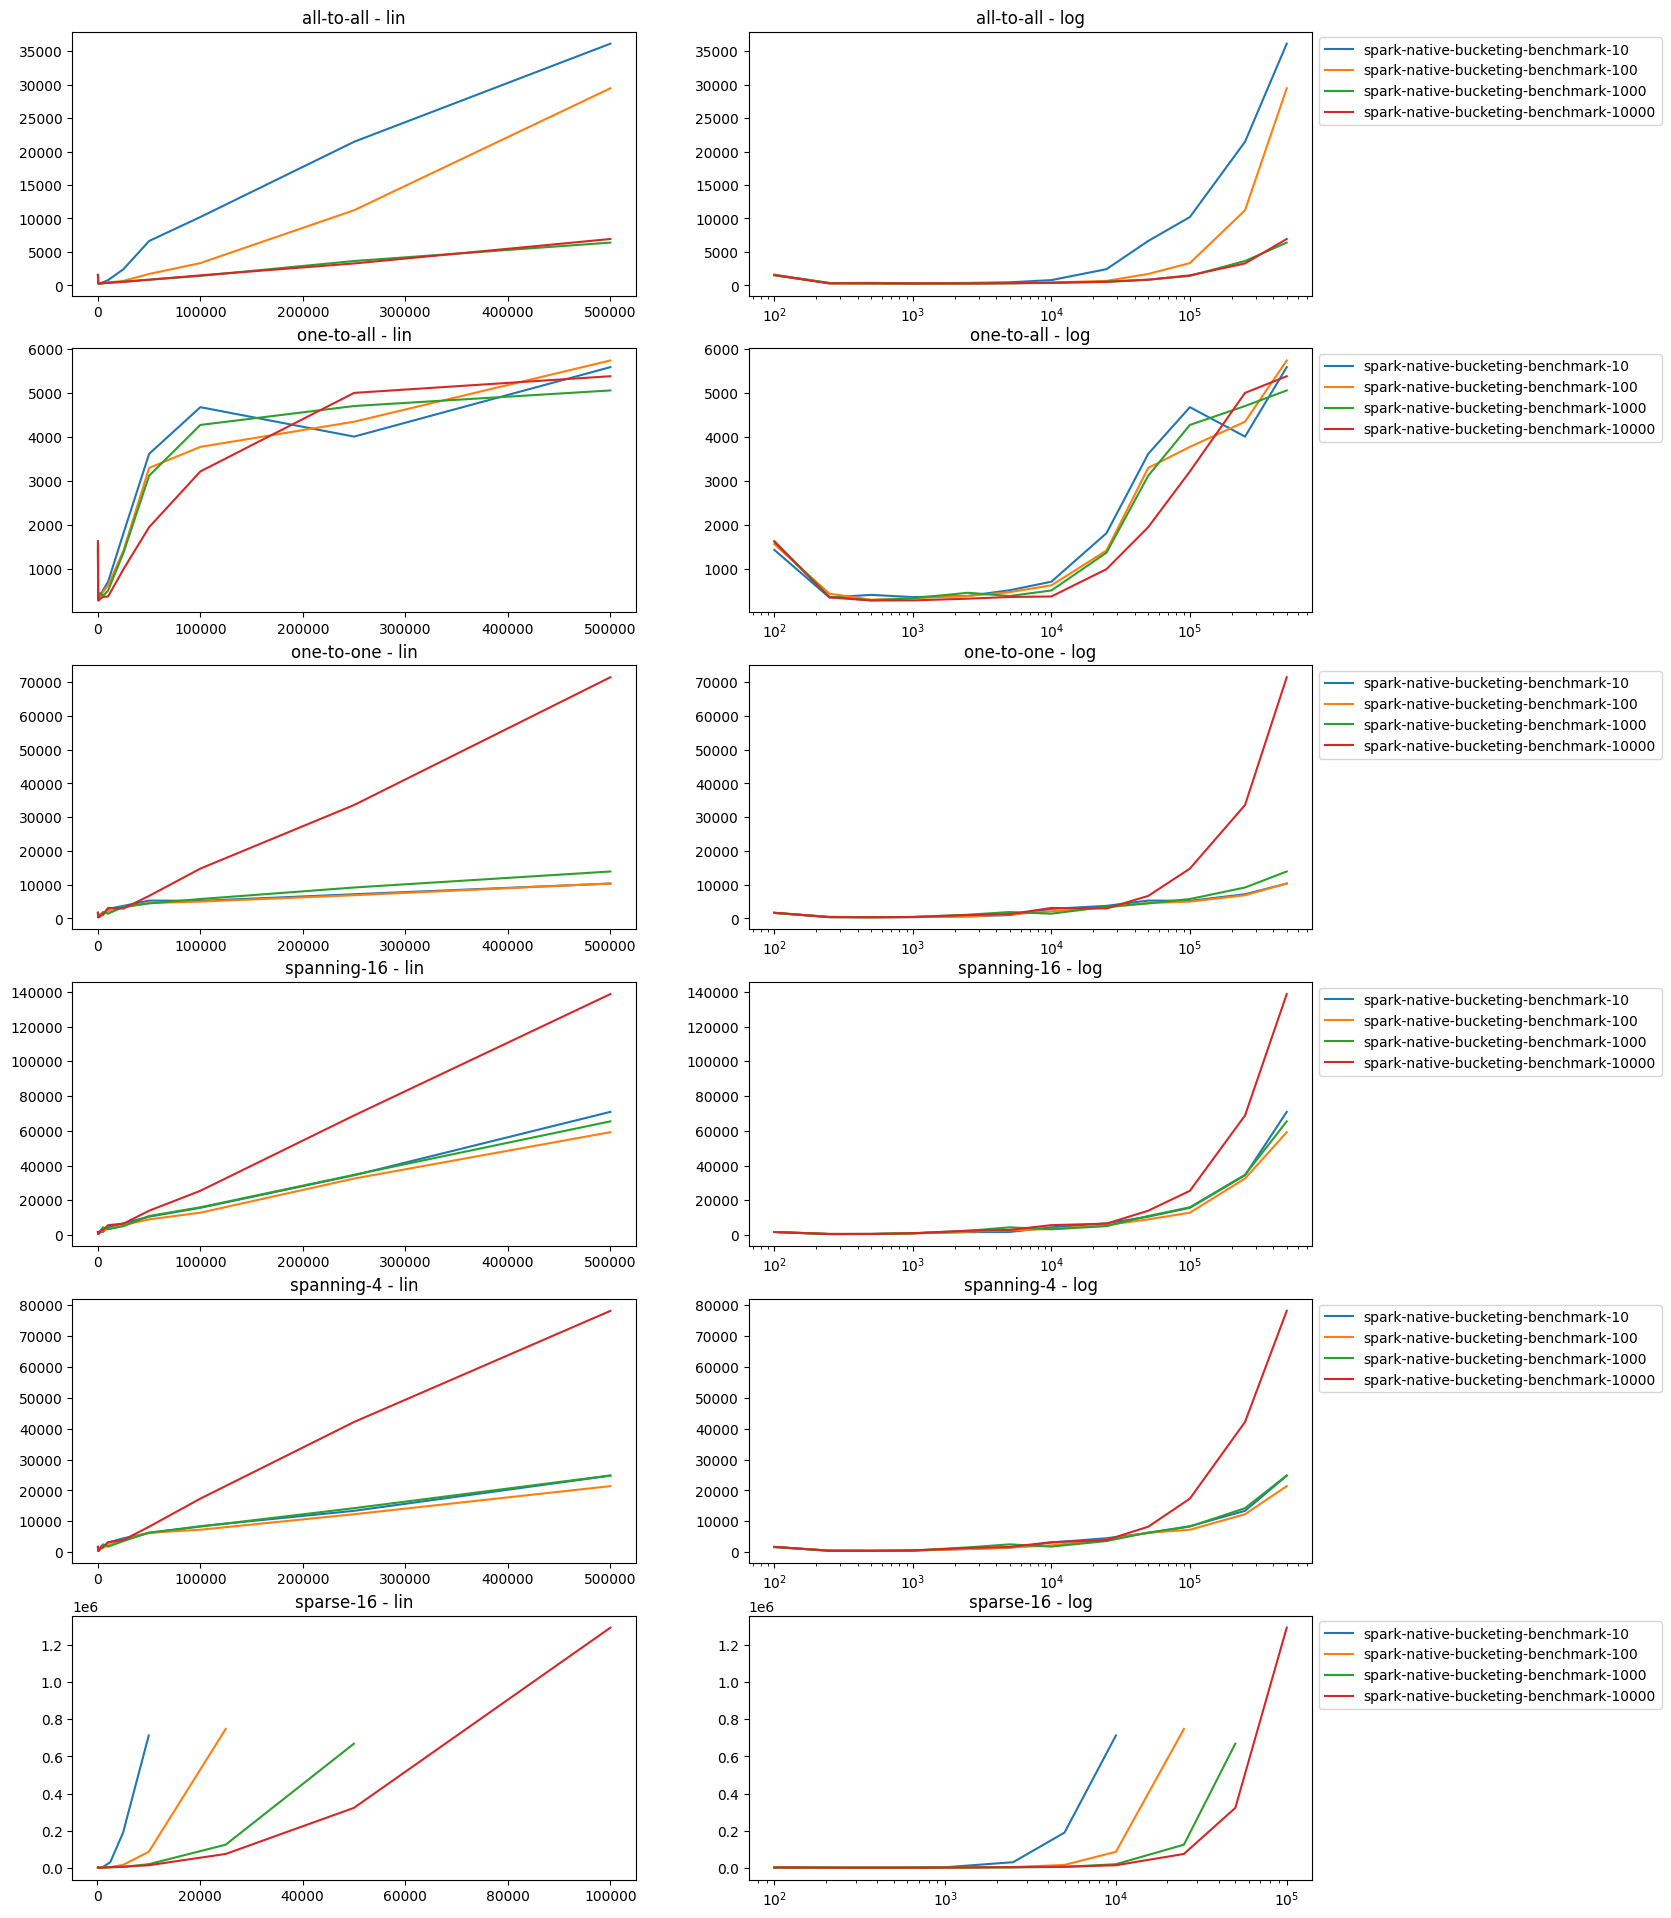

In [73]:
plot_dataset(benchmark_results_df, join_names = [
    "spark-native-bucketing-benchmark-10",
    "spark-native-bucketing-benchmark-100",
    "spark-native-bucketing-benchmark-1000",
    "spark-native-bucketing-benchmark-10000"
])